In [1]:
from google.colab import drive # get the access from google drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# packages
import collections
from PIL import Image
import pandas as pd
from tqdm.notebook import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
import keras.backend as K
from keras.callbacks import Callback
import datetime
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import io
from skimage.transform import resize
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from tensorflow.keras.layers.experimental.preprocessing import CenterCrop
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
import imgaug.augmenters as im_aug
%matplotlib inline
print("finish loading!")


finish loading!


In [3]:
path_test = '/content/drive/MyDrive/Colab Notebooks/Test/'
train_images = np.load(path_test + 'train_images.npy')
train_labels = np.load(path_test + 'train_labels.npy')
test_images = np.load(path_test + 'test_images.npy')
test_labels = np.load(path_test + 'test_labels.npy')

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np


In [5]:
# Load the Xception model pre-trained on ImageNet
base_model = Xception(weights='imagenet', include_top=False)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(4, activation='softmax')  # Assuming 4 classes
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

83683744/83683744 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, None, None, 2048   20861480  
                             )                                   
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21387052 (81.59 MB)
Trainable params: 525572 (2.00 MB)
Non-trainable params: 20861480 (79.58 MB)
____________

In [6]:
# Train the model (Assuming you have train_images and train_labels already loaded)
history = model.fit(train_images, train_labels, epochs=20, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/20
41/41 [==============================] - 26s 370ms/step - loss: 1.0317 - accuracy: 0.5370 - val_loss: 0.9718 - val_accuracy: 0.6006
Epoch 2/20
41/41 [==============================] - 8s 195ms/step - loss: 0.8438 - accuracy: 0.6362 - val_loss: 0.9038 - val_accuracy: 0.6494
Epoch 3/20
41/41 [==============================] - 8s 196ms/step - loss: 0.7764 - accuracy: 0.6842 - val_loss: 0.8992 - val_accuracy: 0.6280
Epoch 4/20
41/41 [==============================] - 8s 197ms/step - loss: 0.6932 - accuracy: 0.7269 - val_loss: 0.8760 - val_accuracy: 0.6646
Epoch 5/20
41/41 [==============================] - 9s 225ms/step - loss: 0.6468 - accuracy: 0.7544 - val_loss: 0.9242 - val_accuracy: 0.6037
Epoch 6/20
41/41 [==============================] - 9s 228ms/step - loss: 0.6239 - accuracy: 0.7635 - val_loss: 0.8949 - val_accuracy: 0.6585
Epoch 7/20
41/41 [==============================] - 9s 226ms/step - loss: 0.5757 - accuracy: 0.7796 - val_loss: 0.8533 - val_accuracy: 0.6463
Epoch

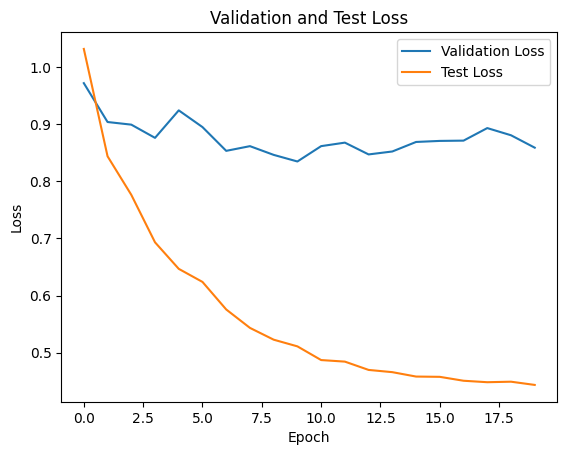

In [7]:
# Extract validation and test loss from history
val_loss = history.history['val_loss']
test_loss = history.history['loss']

# Plot validation and test loss
plt.plot(val_loss, label='Validation Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Validation and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


11/11 [==============================] - 2s 145ms/step - loss: 0.8589 - accuracy: 0.6829
Test accuracy: 0.6829268336296082


In [9]:
# Predict classes for test images
test_pred = model.predict(test_images)
test_pred_classes = np.argmax(test_pred, axis=1)

11/11 [==============================] - 2s 156ms/step


In [10]:
from sklearn.metrics import classification_report

# Generate confusion matrix
conf_mat = confusion_matrix(test_labels, test_pred_classes)

# Define the class names
classes = ['Cofield','Depuy','Tornier','Zimmer']

# Print classification report
print("Classification Report:")
print(classification_report(test_labels, test_pred_classes, target_names=classes))


Classification Report:
              precision    recall  f1-score   support

     Cofield       0.86      0.59      0.70        86
       Depuy       0.51      1.00      0.68        70
     Tornier       0.81      0.81      0.81        88
      Zimmer       0.73      0.38      0.50        84

    accuracy                           0.68       328
   macro avg       0.73      0.70      0.67       328
weighted avg       0.74      0.68      0.67       328



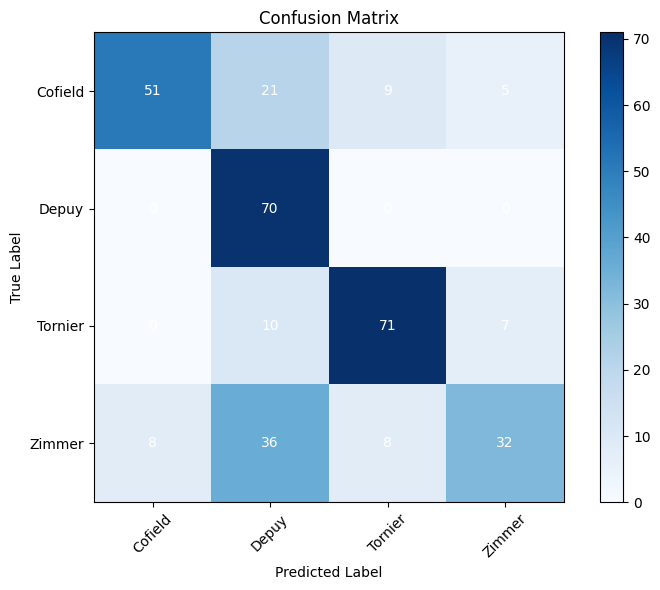

In [11]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat, cmap=plt.cm.Blues, interpolation ='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_mat[i, j]), ha='center', va='center', color='white')
plt.tight_layout()
plt.show()